Different morphologies of the same neuron type might require different activation to reach comparable firing frequency. InputScaling simulates a network of a neuron type with different number of inputs, and different frequency to infer what level of input is needed.

Here we look at the input to ```neuron_types="fs"```.

During a simulation we can vary the input frequency, but not the number of inputs coupled to a neuron, so we use a set of ```num_replicas``` copies of each morphology, each receiving a different number of inputs from ```num_input_min``` to ```num_input_max``` of a given ```input_type``` (e.g. for striatum "cortical" or "thalamic"). Note that if 100 inputs are requested, then on average 100 inputs will be placed, but the number can vary as the placement is random.

A set of input frequencies are tested, specified by ```input_frequency_range```, and each of these frequencies is run for ```input_duration``` seconds. In this example we create a small example, but we recommend that use use a longer input duration (e.g. 10 seconds, or possibly more).

The user can specify ```parameter_id```, ```morphology_id``` and (neuron) ```modulation_id``` to be used for the neuron model. Each parameter_id can have multiple morphologies associated with it. This means that  ```parameter_id=0, morphology_id=0``` might refer to a different morphology than ```parameter_id=1, morphology_id=0```. Since ```morphology_id=0``` simply means the first morphology in the list of available morphologies for a given ```parameter_id```.

In [1]:
import os
from snudda.input.input_tuning import InputTuning
network_path = os.path.join("networks", "input_tuning")
snudda_data = os.path.join("..", "..", "..", "BasalGangliaData", "data/")
input_tuning = InputTuning(network_path=network_path, snudda_data=snudda_data)

We create a network without any synapses and connect different number of external inputs to the neurons. Each neuron then receives a range of input frequencies. Here ```neurons_path``` points to the folder that contains all the different neuron types. Note that we use ```$DATA``` to refer to the ```snudda/data``` folder, but you can use an absolute path instead if you have your own neurons folder. If you want to specify a single specific neuron model, then use ```single_neuron_path``` instead, and set ```neurons_path = None```

If you use your own neurons you probably want to compile the neuron mechanisms from another folder when calling ```nrnivmodl``` below.

Also note that the folder names for the different neurons must be lowercase.

In [2]:
neurons_path = None # os.path.join("$DATA", "neurons", "striatum")
single_neuron_path = os.path.join("$DATA", "neurons", "striatum", "fs", "str-fs-e161024_FS16-mDR-rat-Mar-13-08-1-536-R-v20210210")

# You can use parameter_key and morphology_key (better than using parameter_id and morphology_id)
input_tuning.setup_network(neurons_path=neurons_path, 
                           num_replicas=20,
                           neuron_types="fs",
                           parameter_key="p31916918",
                           morphology_key="m27aed108",
                           modulation_key=None,
                           single_neuron_path=single_neuron_path)
input_tuning.setup_input(input_type="cortical",  # eg. "cortical" or "thalamic"
                         num_input_min=10,
                         num_input_max=200,
                         input_duration=2.0,
                         input_frequency_range=[1.0, 2.0])

Writing network config file to networks/input_tuning/network-config.json
Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/input_tuning/network-config.json
Generating 10928 points for data/mesh/InputTestMesh.obj
n_points = 10857, previous close_pairs = 763
n_points = 10846, previous close_pairs = 643
n_points = 10222, previous close_pairs = 624
Filtering 10222 points..
Filtering, keeping inside points: 9293 / 10222
Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/input_tuning/network-config.json
No d_view specified, running distribute neurons in serial
No connections specified in connectivity_distribution.
No file networks/input_tuning/pruning_merge_info.json
Using cortical synapse density for input.
Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/input_tuning/network-config.json
!!! Warning, combining definition of cortical with cortical input for neuron fs 0 (meta modified by input_config)
!!! Warning, combining definition of cortica

In [3]:
from snudda.input import SnuddaInput

si = SnuddaInput(input_config_file=input_tuning.input_config_file,
                 hdf5_network_file=input_tuning.network_file,
                 spike_data_filename=input_tuning.input_spikes_file,
                 time=input_tuning.max_time)
si.generate()

Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/input_tuning/network-config.json
!!! Warning, combining definition of cortical with cortical input for neuron fs 0 (meta modified by input_config)
!!! Warning, combining definition of cortical with cortical input for neuron fs 1 (meta modified by input_config)
!!! Warning, combining definition of cortical with cortical input for neuron fs 2 (meta modified by input_config)
!!! Warning, combining definition of cortical with cortical input for neuron fs 3 (meta modified by input_config)
!!! Warning, combining definition of cortical with cortical input for neuron fs 4 (meta modified by input_config)
!!! Warning, combining definition of cortical with cortical input for neuron fs 5 (meta modified by input_config)
!!! Warning, combining definition of cortical with cortical input for neuron fs 6 (meta modified by input_config)
!!! Warning, combining definition of cortical with cortical input for neuron fs 7 (meta modified by inp

In [4]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks
Mod files: "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/bk_ch.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/bk_fs.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/bk_ms.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/ca_ch.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/cadyn_fs.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/cadyn_ms.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/cal12_ms.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/cal13_ms.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/cal_ch.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/caldyn_ms.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mecha

## For large runs, to simulate in parallel use:

```mpiexec -n 4 python3 ../../snudda/input/input_tuning.py simulate networks/input_tuning/```

If you have more than four cores available on your machine, increase the number of workers accordingly.

## Below we just run it in serial in the notebook:

In [5]:
input_tuning.simulate()

NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64, aarch64, arm64 directories (or nrnmech.dll) then you will force a recompilation of the modules.
Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/input_tuning/network-config.json
0 : Memory status: 70% free
numprocs=1
0 : Memory status: 70% free
Added 0.0 gap junctions to simulation (0 total)
Added 0 synapses to simulation (0 total)
0 : Memory status: 70% free
0 : Memory status: 70% free
0 : Memory status: 70% free
Running simulation for 4000.0 ms.
Running simulation for 4.0 s
Running Neuron simulator 4000 ms, with dt=0.025
1% done. Elapsed: 1.5 s, estimated time left: 143.7 s
82% done. Elapsed: 101.5 s, estimated time left: 22.3 s
Neuron simulation finished
Simulation run time: 126.2 s
Simulation done, saving output
Writing network output to networks/input_tuning/simulations/output.hdf5
Using sample dt = 0.005 (sample step size 200)
Worker 1/1 writing dat

## Analyse results

Loading networks/input_tuning/simulations/output.hdf5


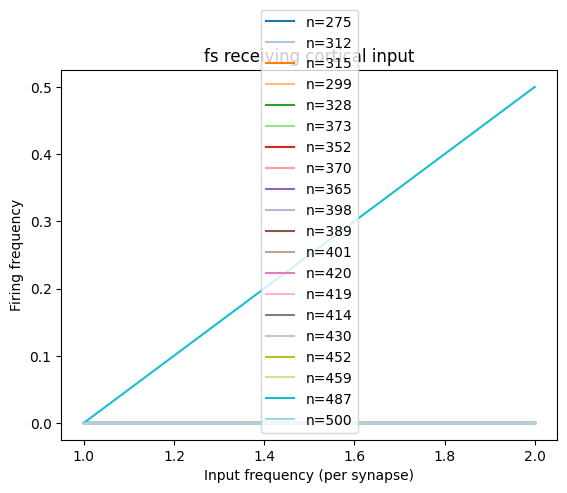

<Figure size 640x480 with 0 Axes>

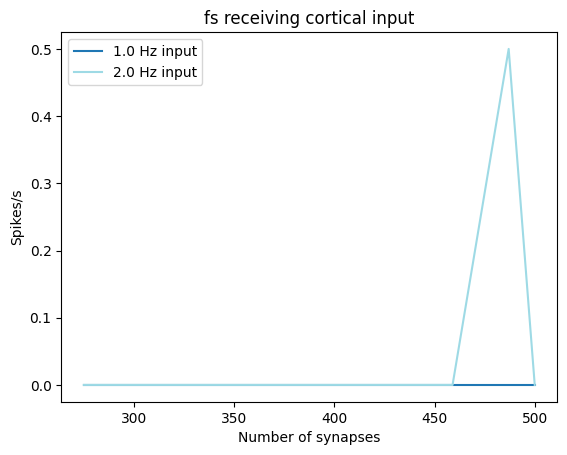

<Figure size 640x480 with 0 Axes>

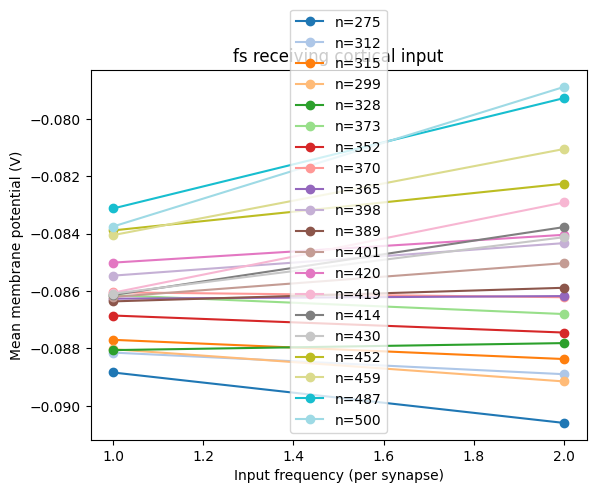

<Figure size 640x480 with 0 Axes>

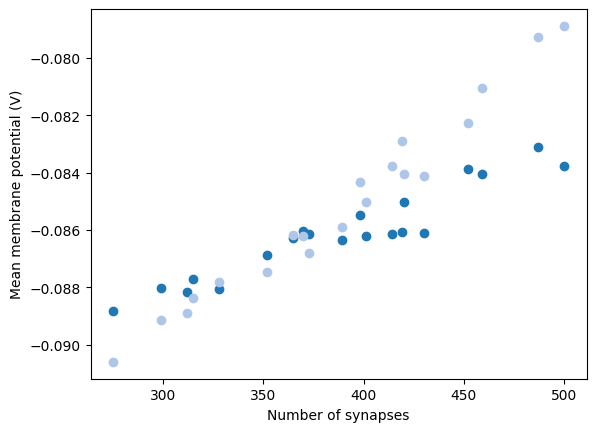

To plot traces:
python3 plotting/Network_plot_traces.py networks/input_tuningoutput_volt.txt networks/input_tuningnetwork-synapses.hdf5 


<Figure size 640x480 with 0 Axes>

In [6]:
%matplotlib inline

input_tuning.analyse_results(show_plots=True)